In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

from IPython.display import Markdown, display
%matplotlib inline

### Load a file from the 201905 hindcast

In [2]:
f1=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jan_climate_2007_2019_ptrc_T.nc')

In [3]:
f2=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_feb_climate_2007_2019_ptrc_T.nc')

In [4]:
f3=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_mar_climate_2007_2019_ptrc_T.nc')

In [5]:
f4=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_apr_climate_2007_2019_ptrc_T.nc')

In [6]:
f5=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_ptrc_T.nc')

In [7]:
f6=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jun_climate_2007_2019_ptrc_T.nc')

In [8]:
f7=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jul_climate_2007_2019_ptrc_T.nc')

In [9]:
f8=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_aug_climate_2007_2019_ptrc_T.nc')

In [10]:
f9=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_sep_climate_2007_2019_ptrc_T.nc')

In [11]:
f10=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_oct_climate_2007_2019_ptrc_T.nc')

In [12]:
f11=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_nov_climate_2007_2019_ptrc_T.nc')

In [13]:
f12=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_dec_climate_2007_2019_ptrc_T.nc')

In [14]:
print(f1.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


In [15]:
fe3t1=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jan_climate_2007_2019_carp_T.nc')

In [16]:
fe3t2=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_feb_climate_2007_2019_carp_T.nc')

In [17]:
fe3t3=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_mar_climate_2007_2019_carp_T.nc')

In [18]:
fe3t4=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_apr_climate_2007_2019_carp_T.nc')

In [19]:
fe3t5=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_carp_T.nc')

In [20]:
fe3t6=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jun_climate_2007_2019_carp_T.nc')

In [21]:
fe3t7=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_jul_climate_2007_2019_carp_T.nc')

In [22]:
fe3t8=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_aug_climate_2007_2019_carp_T.nc')

In [23]:
fe3t9=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_sep_climate_2007_2019_carp_T.nc')

In [24]:
fe3t10=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_oct_climate_2007_2019_carp_T.nc')

In [25]:
fe3t11=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_nov_climate_2007_2019_carp_T.nc')

In [26]:
fe3t12=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_dec_climate_2007_2019_carp_T.nc')

In [27]:
# return times as datetime objects:
torig=dt.datetime.strptime(f1.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f1.variables['time_centered'][:]])

1900-01-01 00:00:00


In [28]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


## Depth-Integrated Plots

<ipython-input-30-656db0ec2304>:16: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[0,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz1*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
<ipython-input-30-656db0ec2304>:23: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[0,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz2*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
<ipython-input-30-656db0ec2304>:30: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not mono

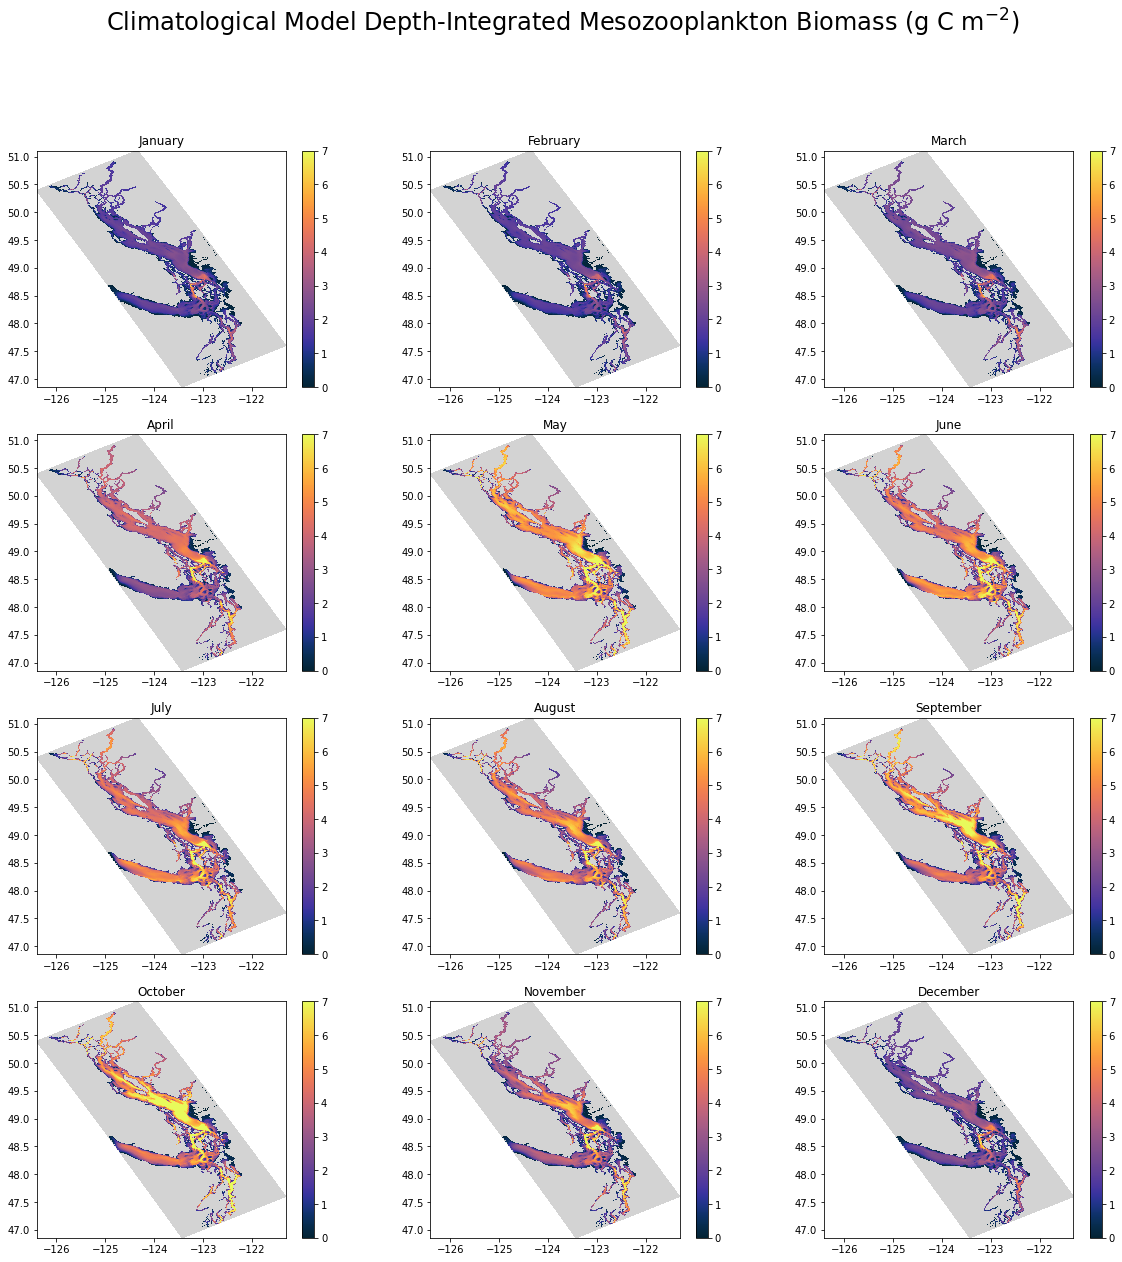

In [30]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('lightgrey')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(4,3,figsize=(20,20))
fig.suptitle('Climatological Model Depth-Integrated Mesozooplankton Biomass (g C m$^{-2}$)', fontsize=24)

vmin=0
vmax=7

intuz1=np.sum(f1.variables['mesozooplankton'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz=intuz/np.sum(fe3t.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz1*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[0,0],coords='map')
ax[0,0].set_title('January');
fig.colorbar(m1,ax=ax[0,0])

intuz2=np.sum(f2.variables['mesozooplankton'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz1=intuz1/np.sum(fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz2*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[0,1],coords='map')
ax[0,1].set_title('February');
fig.colorbar(m1,ax=ax[0,1])

intuz3=np.sum(f3.variables['mesozooplankton'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz2=intuz2/np.sum(fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz3*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[0,2],coords='map')
ax[0,2].set_title('March');
fig.colorbar(m1,ax=ax[0,2])

intuz4=np.sum(f4.variables['mesozooplankton'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz4*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[1,0],coords='map')
ax[1,0].set_title('April');
fig.colorbar(m1,ax=ax[1,0])

intuz5=np.sum(f5.variables['mesozooplankton'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz5*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[1,1],coords='map')
ax[1,1].set_title('May');
fig.colorbar(m1,ax=ax[1,1])

intuz6=np.sum(f6.variables['mesozooplankton'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz6*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[1,2],coords='map')
ax[1,2].set_title('June');
fig.colorbar(m1,ax=ax[1,2])

intuz7=np.sum(f7.variables['mesozooplankton'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[2,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz7*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[2,0],coords='map')
ax[2,0].set_title('July');
fig.colorbar(m1,ax=ax[2,0])

intuz8=np.sum(f8.variables['mesozooplankton'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[2,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz8*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[2,1],coords='map')
ax[2,1].set_title('August');
fig.colorbar(m1,ax=ax[2,1])

intuz9=np.sum(f9.variables['mesozooplankton'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[2,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz9*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[2,2],coords='map')
ax[2,2].set_title('September');
fig.colorbar(m1,ax=ax[2,2])

intuz10=np.sum(f10.variables['mesozooplankton'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[3,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz10*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[3,0],coords='map')
ax[3,0].set_title('October');
fig.colorbar(m1,ax=ax[3,0])

intuz11=np.sum(f11.variables['mesozooplankton'][il,:,:,:]*fe3t11.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[3,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz11*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[3,1],coords='map')
ax[3,1].set_title('November');
fig.colorbar(m1,ax=ax[3,1])

intuz12=np.sum(f12.variables['mesozooplankton'][il,:,:,:]*fe3t12.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
#avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[3,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(intuz12*5.7*12/1000)),cmap=cmap0,vmin=vmin,vmax=vmax,shading='nearest')
viz_tools.set_aspect(ax[3,2],coords='map')
ax[3,2].set_title('December');
fig.colorbar(m1,ax=ax[3,2])

###### Mesozooplankton biomass is highest in Gulf Islands Haro Strait regions and in Central Basin of Puget Sound throughout most of the year


###### September and October also show high mesozooplankton biomass in Central and Southern SoG

## Depth-Averaged Plots

<ipython-input-30-c90428dc6497>:13: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[0,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz1*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
<ipython-input-30-c90428dc6497>:20: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m1=ax[0,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz2*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
<ipython-input-30-c90428dc6497>:27: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasi

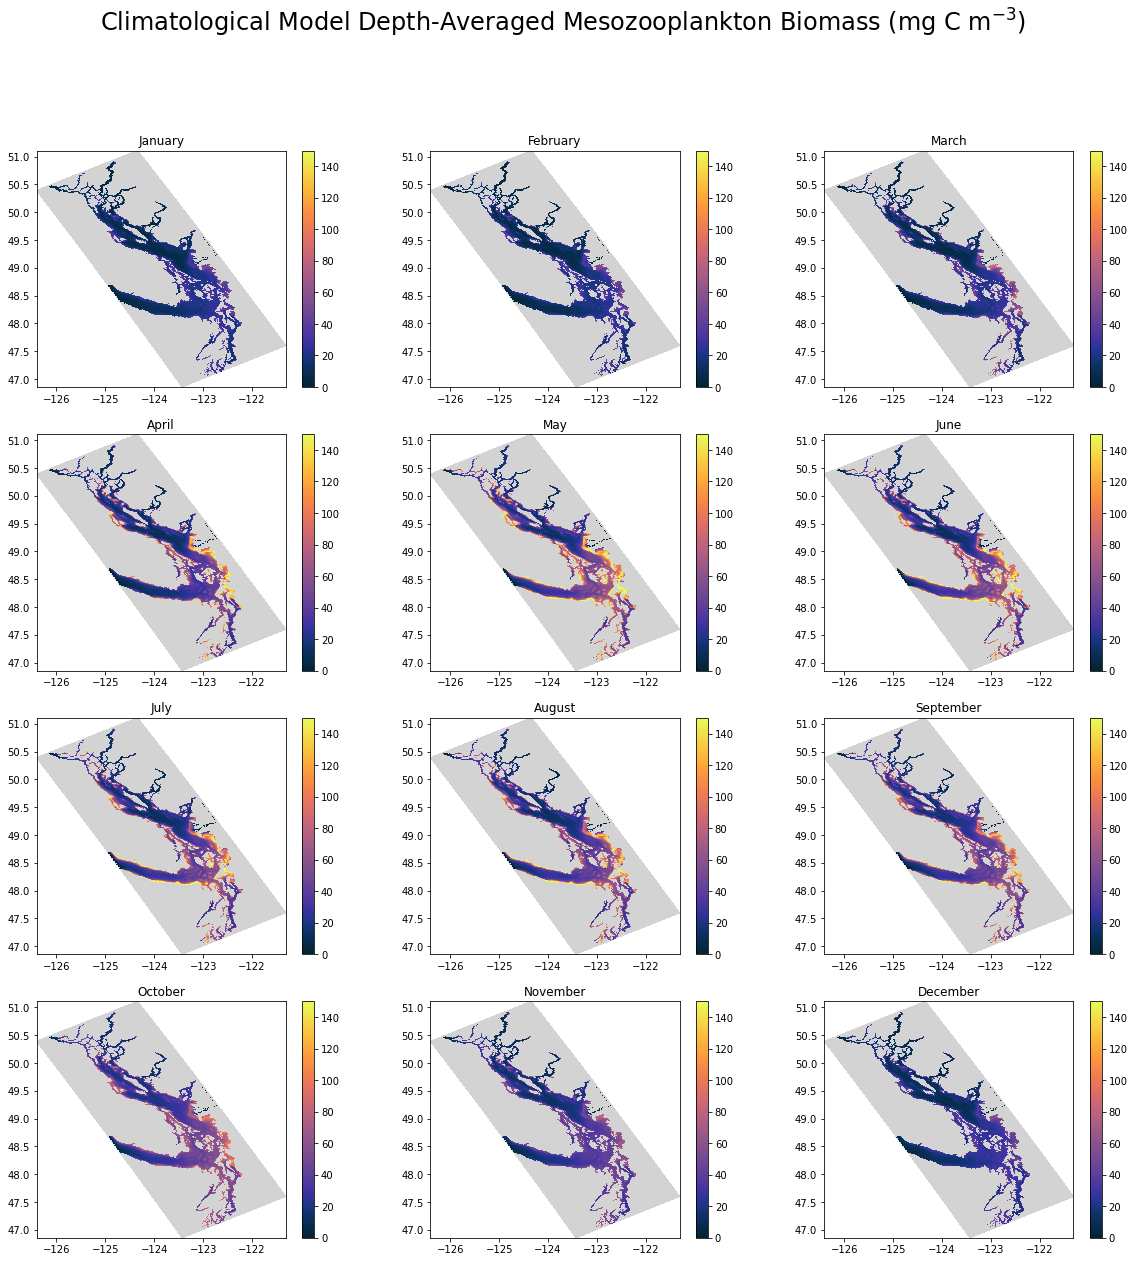

In [30]:
# with pcolormesh: no smoothing
cmap0=cmocean.cm.thermal
cmap0.set_bad('lightgrey')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
fig,ax=plt.subplots(4,3,figsize=(20,20))
fig.suptitle('Climatological Model Depth-Averaged Mesozooplankton Biomass (mg C m$^{-3}$)', fontsize=24)

intuz1=np.sum(f1.variables['mesozooplankton'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz1=intuz1/np.sum(fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz1*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[0,0],coords='map')
ax[0,0].set_title('January');
fig.colorbar(m1,ax=ax[0,0])

intuz2=np.sum(f2.variables['mesozooplankton'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz2=intuz2/np.sum(fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz2*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[0,1],coords='map')
ax[0,1].set_title('February');
fig.colorbar(m1,ax=ax[0,1])

intuz3=np.sum(f3.variables['mesozooplankton'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz3=intuz3/np.sum(fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[0,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz3*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[0,2],coords='map')
ax[0,2].set_title('March');
fig.colorbar(m1,ax=ax[0,2])

intuz4=np.sum(f4.variables['mesozooplankton'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz4=intuz4/np.sum(fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz4*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[1,0],coords='map')
ax[1,0].set_title('April');
fig.colorbar(m1,ax=ax[1,0])

intuz5=np.sum(f5.variables['mesozooplankton'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz5=intuz5/np.sum(fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz5*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[1,1],coords='map')
ax[1,1].set_title('May');
fig.colorbar(m1,ax=ax[1,1])

intuz6=np.sum(f6.variables['mesozooplankton'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz6=intuz6/np.sum(fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[1,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz6*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[1,2],coords='map')
ax[1,2].set_title('June');
fig.colorbar(m1,ax=ax[1,2])

intuz7=np.sum(f7.variables['mesozooplankton'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz7=intuz7/np.sum(fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[2,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz7*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[2,0],coords='map')
ax[2,0].set_title('July');
fig.colorbar(m1,ax=ax[2,0])

intuz8=np.sum(f8.variables['mesozooplankton'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz8=intuz8/np.sum(fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[2,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz8*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[2,1],coords='map')
ax[2,1].set_title('August');
fig.colorbar(m1,ax=ax[2,1])

intuz9=np.sum(f9.variables['mesozooplankton'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz9=intuz9/np.sum(fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[2,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz9*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[2,2],coords='map')
ax[2,2].set_title('September');
fig.colorbar(m1,ax=ax[2,2])

intuz10=np.sum(f10.variables['mesozooplankton'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz10=intuz10/np.sum(fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[3,0].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz10*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[3,0],coords='map')
ax[3,0].set_title('October');
fig.colorbar(m1,ax=ax[3,0])

intuz11=np.sum(f11.variables['mesozooplankton'][il,:,:,:]*fe3t11.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz11=intuz11/np.sum(fe3t11.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[3,1].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz11*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[3,1],coords='map')
ax[3,1].set_title('November');
fig.colorbar(m1,ax=ax[3,1])

intuz12=np.sum(f12.variables['mesozooplankton'][il,:,:,:]*fe3t12.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
avguz12=intuz12/np.sum(fe3t12.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
m1=ax[3,2].pcolormesh(navlon,navlat,np.ma.masked_where(tmask[0,0,:,:]==0,(avguz12*5.7*12)),cmap=cmap0,vmin=0,vmax=150,shading='nearest')
viz_tools.set_aspect(ax[3,2],coords='map')
ax[3,2].set_title('December');
fig.colorbar(m1,ax=ax[3,2])

### Thalweg plot
  method using contour_thalweg from visualisations.py in tools repo

In [31]:
#open bathy file and meshmask
fbathy=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/bathymetry_201702.nc')
fmesh=nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc')

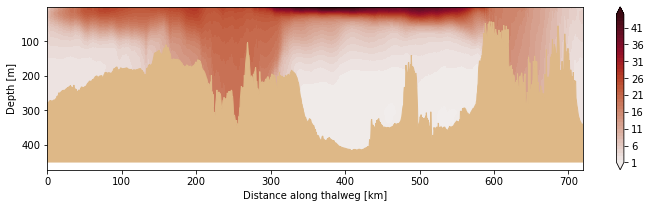

In [47]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
cb=visualisations.contour_thalweg(ax,f1.variables['mesozooplankton'][il,...]*5.7*12,fbathy,fmesh,clevels=50,cmap=cmocean.cm.amp)
 

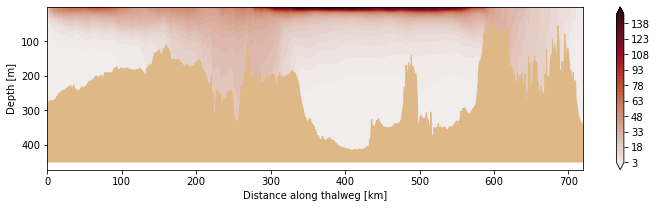

In [43]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
cb=visualisations.contour_thalweg(ax,f4.variables['mesozooplankton'][il,...]*5.7*12,fbathy,fmesh,clevels=50,cmap=cmocean.cm.amp)

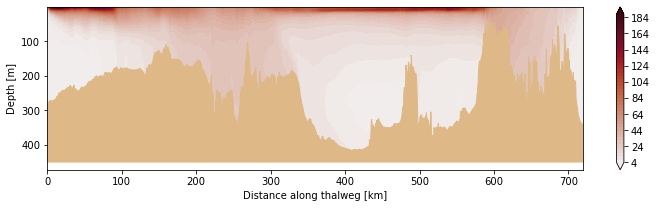

In [48]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
cb=visualisations.contour_thalweg(ax,f8.variables['mesozooplankton'][il,...]*5.7*12,fbathy,fmesh,clevels=50,cmap=cmocean.cm.amp)

In [31]:
f1.close()
fe3t1.close()

In [32]:
f2.close()
fe3t2.close()

In [33]:
f3.close()
fe3t3.close()

In [34]:
f4.close()
fe3t4.close()

In [35]:
f5.close()
fe3t5.close()

In [36]:
f6.close()
fe3t6.close()

In [37]:
f7.close()
fe3t7.close()

In [38]:
f8.close()
fe3t8.close()

In [39]:
f9.close()
fe3t9.close()

In [40]:
f10.close()
fe3t10.close()

In [41]:
f11.close()
fe3t11.close()

In [42]:
f12.close()
fe3t12.close()